In [30]:
from pathlib import Path
import os
import toml
from IPython import get_ipython
from IPython.core.magic import register_cell_magic

ipython = get_ipython()


@register_cell_magic
def pybash(line, cell):
    ipython.run_cell_magic("bash", "", cell.format(**globals()))

In [31]:
tmp_dir = Path("../tmp/files_example")
structure_file = Path("../data/1KT0/1kt0.cif")
structure_svg = tmp_dir / "1kt0.svg"
style_file = tmp_dir / "style.toml"
annotations_file = tmp_dir / "annotations.toml"


os.makedirs(tmp_dir, exist_ok=True)

In [32]:
annotations = """
# FlatProt Annotation Example
# This file demonstrates the different types of annotations available in FlatProt

[[annotations]]
type = "point"
label = "Example Point Annotation"
chain = "A"
index = 90

[[annotations]]
type = "point"
label = "Example Point Annotation"
chain = "A"
index = 160

[[annotations]]
type = "line"
label = "Example Line Annotation"
chain = "A"
indices = [45, 67]    # Connect residue 45 to 67

[[annotations]]
type = "line"
label = "Example Line Annotation"
chain = "A"
indices = [200, 210]

[[annotations]]
type = "area"
label = "Example Area Annotation"
chain = "A"
range = { start = 100, end = 150 }


[[annotations]]
type = "area"
label = "Example Area Annotation"
chain = "A"
range = { start = 1, end = 25 }
"""


style = """
# Style definitions for protein secondary structures

[helix]
fill_color = "#FF7D7D"   # Light red
stroke_color = "#CC0000" # Darker red
stroke_width = 1.5
opacity = 0.8
radius = 1.2             # Radius for helix representation

[sheet]
fill_color = "#7D7DFF"   # Light blue
stroke_color = "#0000CC" # Darker blue
stroke_width = 1.5
opacity = 0.8
arrow_width = 3.0        # Width of beta sheet arrows

[coil]
stroke_color = "#777777" # Gray
stroke_width = 1.0
opacity = 1

# Annotation styles

[point_annotation]
radius = 2               # Will be converted to stroke_width = 5
fill_color = "#FFA500"   # Orange
stroke_color = "#000000" # Black
opacity = 0.9
shape = "circle"         # Default shape for point annotations

[line_annotation]
stroke_color = "#00CC00" # Green
stroke_width = 2.0
opacity = 1.0
dash_array = "5,3"       # Creates a dashed line pattern

[area_annotation]
fill_color = "#FFFF00"   # Yellow
stroke_color = "#CCCC00" # Darker yellow
stroke_width = 1.0
opacity = 0.3
border_radius = 5        # Rounded corners for area annotations

# Global canvas settings

[canvas]
background_color = "#FFFFFF" # White background
width = 800
height = 600
padding = 50

# Default annotation styles if not specified in specific annotation types

[annotation]
text_color = "#000000"            # Black text
font_family = "Arial, sans-serif"
font_size = 12
font_weight = "bold"
"""

with style_file.open("w") as f:
    f.write(style)
with annotations_file.open("w") as f:
    f.write(annotations)


In [33]:
%%pybash
# Access Python variables in bash using curly braces

uv run flatprot project {structure_file} {structure_svg} --style {style_file} --annotations {annotations_file} --quiet



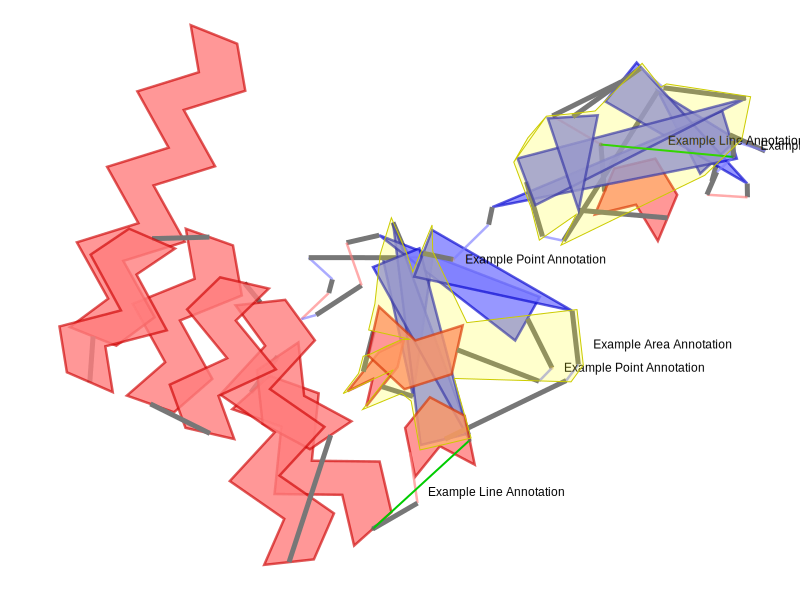

In [34]:
# Display the overlay SVG in the notebook
from IPython.display import SVG, display

# Load and display the overlay SVG
display(SVG(str(structure_svg)))
